In [6]:
import os 
import tensorflow as tf
import numpy as np
from misc import Prob, Basics
from nets import RNNC
from tqdm import tqdm
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

name="task2_dset"
data, labels = np.load(name+"/data.npy"), np.load(name+"/label.npy")

stoppings = []
for k in range(4):
    for kk in range(10**k,10**(k+1),10**k):
        stoppings.append(kk)
for j in range(1,4):
    stoppings.append(j*10**4)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
net = RNNC(seed_val=0.5,lmode=1)
net.load_weights("clipped_lstm_two_losses/net_1/30000")

In [4]:
for k in tqdm(range(10**4)):
    net.train_step(data,labels)

100%|██████████| 10000/10000 [03:18<00:00, 50.26it/s]


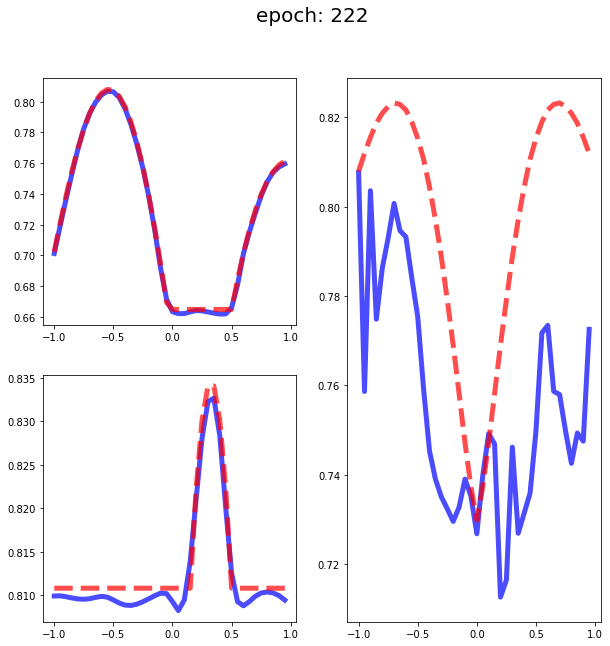

In [11]:
basics = Basics(dolinar_layers=2)
ats = basics.ats
def pn1(n,beta,alpha=0.4):
    p=0
    for pm in [-1,1]:
        p+=Prob(pm*alpha, beta,n)
    return p/2

def Q2(b1,n1,b2,alpha=0.4):
    p=0
    for n2 in [0,1]:
        p+=max([Prob(pm*alpha*np.cos(ats[0]), b1,n1)*Prob(pm*alpha*np.sin(ats[0]), b2,n2) for pm in [-1.,1.]])
    p/=pn1(n1,b1)
    return p/2

def Q1(b1,alpha=0.4):
    p=0
    for n1 in [0,1]:
        p+= max([Q2(b1,n1,b2,alpha) for b2 in np.arange(-1,1,.05)])*pn1(n1,b1)
    return p



betas = np.arange(-1,1,.05)
test1=[]
for b in betas:
    test1.append([b,-1.])
b1=-.5
data_test = {}
for nn in [0.,1.]:
    data_test[str(nn)] = []
    for b in betas:
        data_test[str(nn)].append([[b1,-1.],[b,nn]])


plt.figure(figsize=(10,10))
plt.suptitle("epoch: {}".format(222), size=20)
ax1=plt.subplot2grid((2,2),(0,0))
ax2=plt.subplot2grid((2,2),(1,0))
ax3=plt.subplot2grid((2,2),(0,1),rowspan=2)

axs = {0:ax1,1:ax2}
c=0
for nn in [0.,1.]:
    axs[c].plot(betas, np.squeeze(net(np.reshape(data_test[str(nn)], (len(data_test[str(nn)]), 2,2))))[:,1], alpha=0.7, color="blue", linewidth=5)
    axs[c].plot(betas, [Q2(b1,nn,b) for b in betas], '--', label="Q2", alpha=0.7, linewidth=5, color="red")
    c+=1
ax3.plot(betas,np.squeeze(net(np.expand_dims(test1, axis=0))), alpha=0.7, color="blue", linewidth=5)
ax3.plot(betas, [Q1(b) for b in betas], '--', label="Q1", alpha=0.7, linewidth=5, color="red")


In [10]:
for k in tqdm(range(10**4)):
    net.train_step(data,labels)

100%|██████████| 10000/10000 [03:12<00:00, 52.04it/s]
